<a href="https://colab.research.google.com/github/aysharega/Data_Science_Projects/blob/main/Hackerlab_Camera_caliberation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


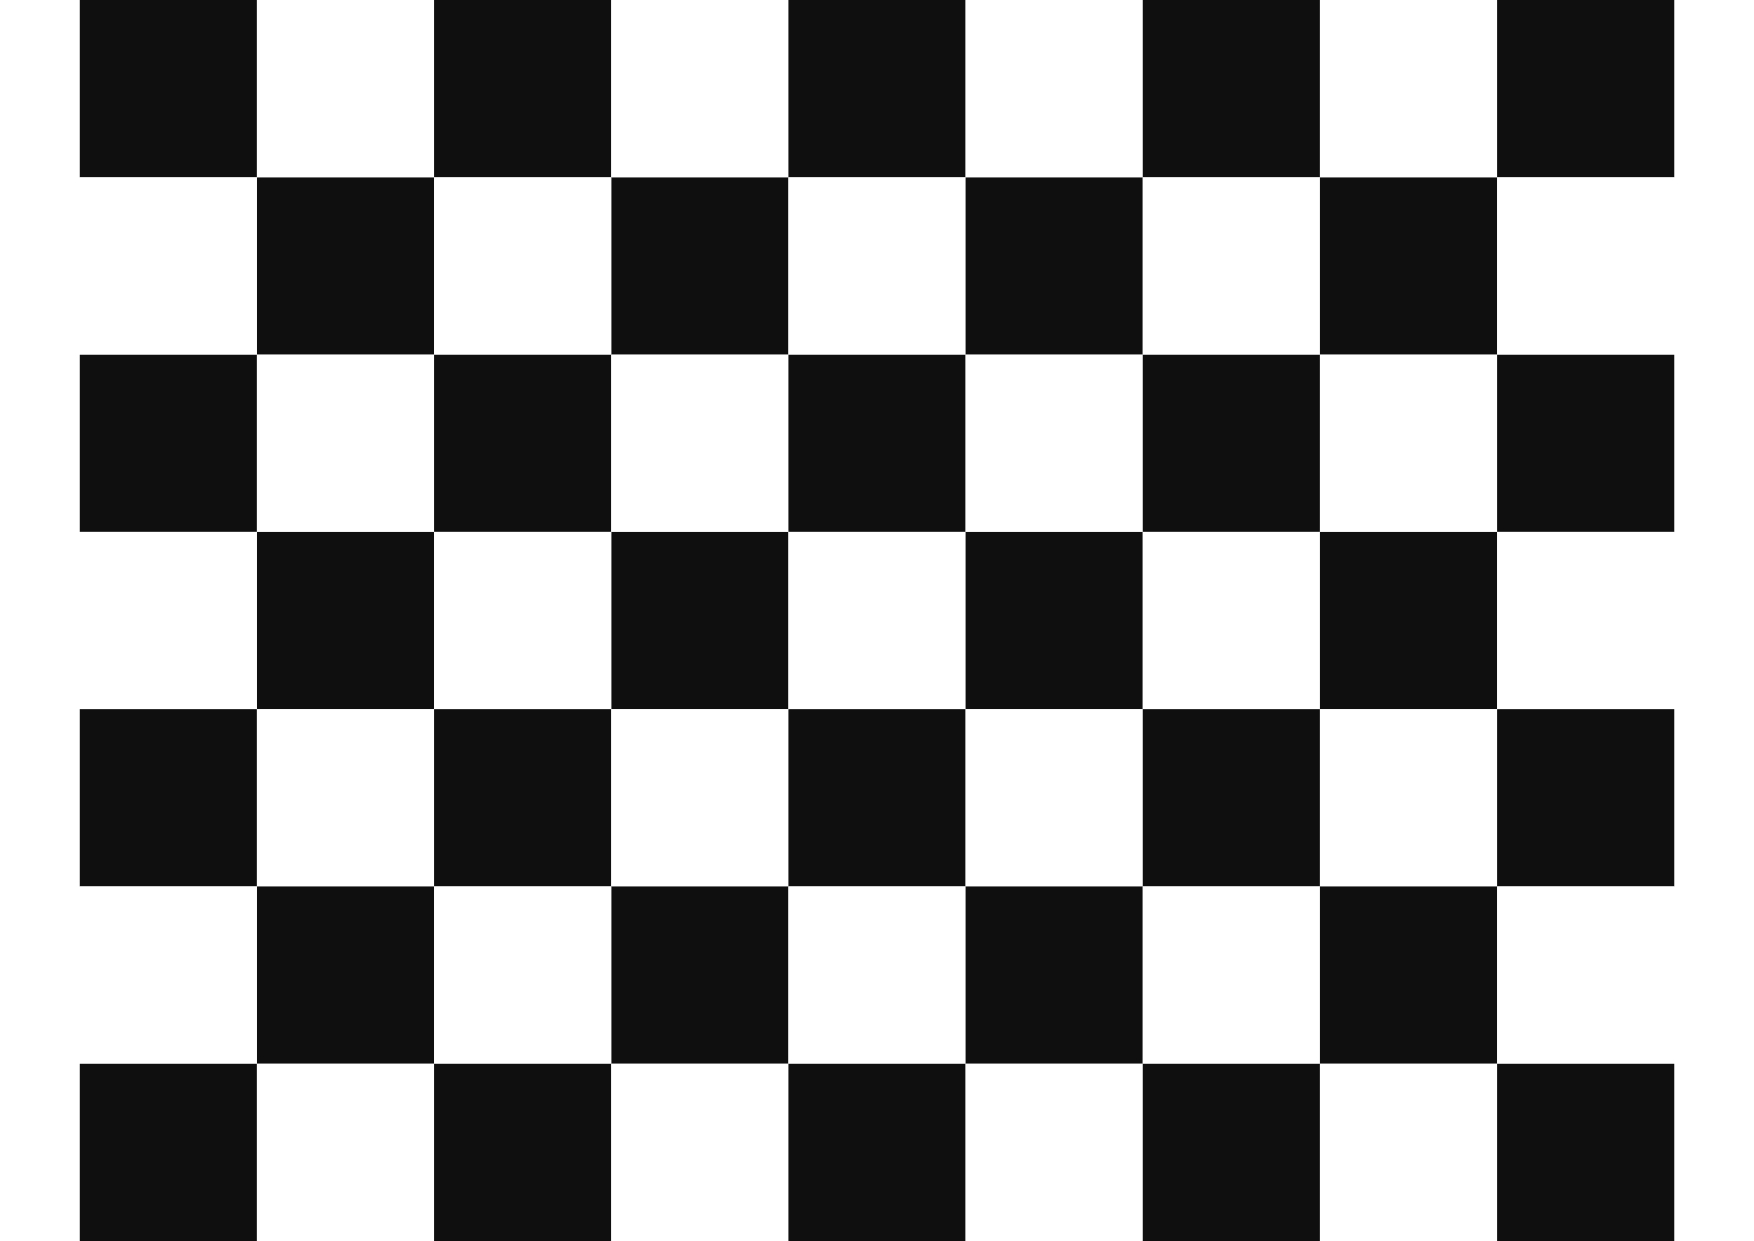

In [10]:

from google.colab.patches import cv2_imshow
img = cv2.imread("/content/Checkerboard-A4-30mm-8x6_page-0001.jpg")
cv2_imshow(img)


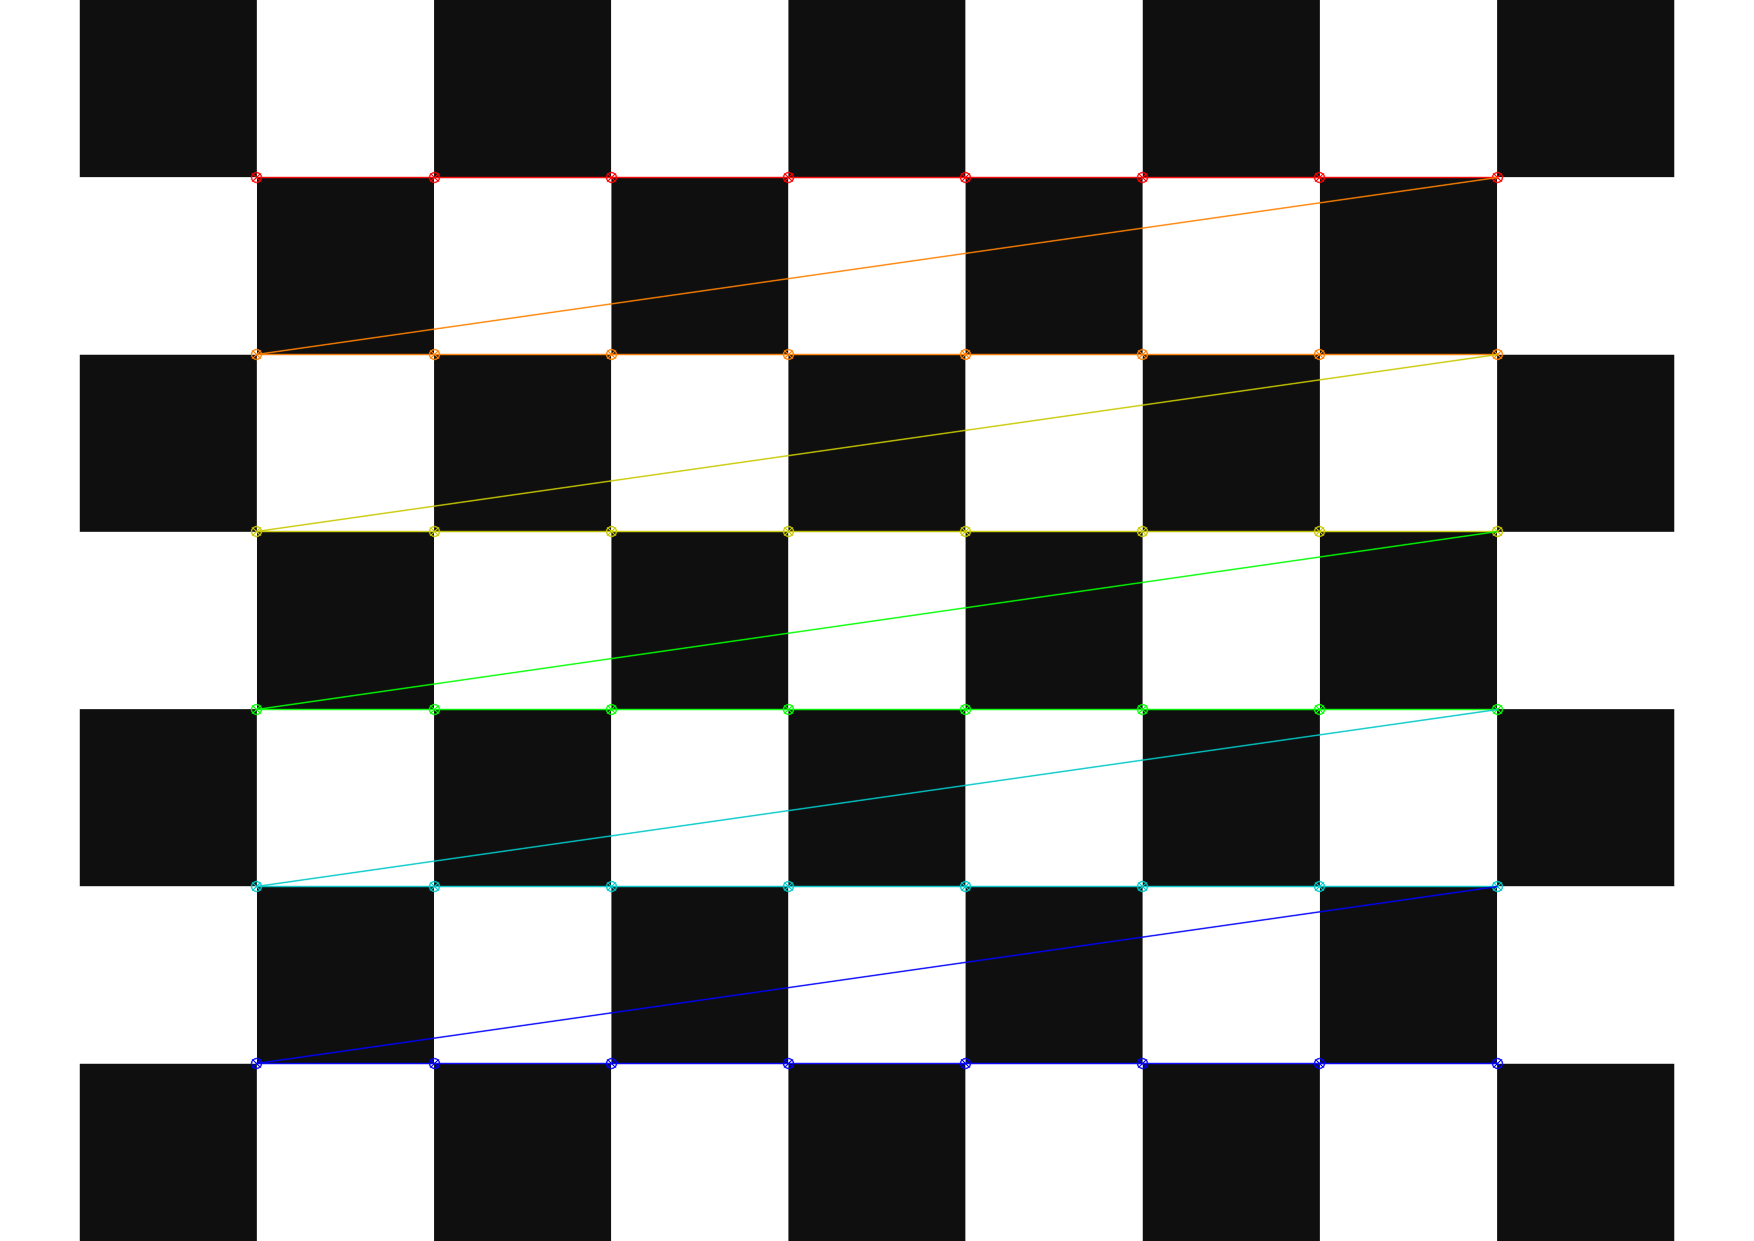

Camera matrix : 

[[2.04466081e+04 0.00000000e+00 3.55435105e+02]
 [0.00000000e+00 2.04564119e+04 6.24670374e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients : 

[[ 9.85698961e-01 -1.55220075e+02  6.60113868e-06 -1.39863014e-03
   2.00076182e-03]]

 Rotation Vectors:
(array([[ 2.78042686e-06],
       [-1.68839259e-02],
       [-1.47799294e-06]]),)

 Translation Vectors:
(array([[ -0.55889678],
       [ -2.52647667],
       [115.4311475 ]]),)


In [21]:
import numpy as np
import cv2
import glob

# Define the dimensions of the checkerboard pattern
pattern_size = (8, 6)

# Define the arrays to store the 3D and 2D points
obj_points = [] # 3D points in real world space
img_points = [] # 2D points in image plane

# Prepare the object points
obj_p = np.zeros((pattern_size[0]*pattern_size[1],3), np.float32)
obj_p[:,:2] = np.mgrid[0:pattern_size[0],0:pattern_size[1]].T.reshape(-1,2)

# Get the image files
images = glob.glob('/content/Checkerboard-A4-30mm-8x6_page-0001.jpg')

# Iterate over each image and detect the corners
for img_path in images:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    # If corners are found, add them to the obj_points and img_points arrays
    if ret:
        obj_points.append(obj_p)
        img_points.append(corners)

        # Draw the corners on the image
        cv2.drawChessboardCorners(img, pattern_size, corners, ret)
        cv2_imshow( img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

# Print the calibration parameters
print("Camera matrix : \n")
print(mtx)
print("\nDistortion coefficients : \n")
print(dist)
print("\n Rotation Vectors:")
print(rvecs) 
print("\n Translation Vectors:")
print(tvecs)